In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from datetime import datetime, timedelta


Датасет - `bus_table.csv`
- `data` - дата
- `route` - название маршрута автобуса
- `direction` - направление маршрута
- `scheduled` - время прибыттия по расписанию
- `actual` - фактическое время прибытия

## Задание 1
Прочитайте файл, сохранив результаты в `df`. Посмотрите статистики и инфо.

In [3]:
df=pd.read_csv('bus_table.csv')
display(df)
print(df.describe())
print(df.info())

,data,route,direction,scheduled,actual
0,2016-03-26,A,south,01:11:57,01:13:19
1,2016-03-26,A,south,23:19:57,23:16:13
2,2016-03-26,A,south,21:19:57,21:18:46
3,2016-03-26,A,south,19:04:57,19:01:49
4,2016-03-26,A,south,16:42:57,16:42:39
...,...,...,...,...,...
39152,2016-05-27,B,north,10:50:25,10:49:50
39153,2016-05-27,B,north,13:02:27,13:07:10
39154,2016-05-27,B,north,15:14:29,15:15:55
39155,2016-05-27,B,north,17:26:29,17:25:40


              data  route direction scheduled    actual
count        39157  39157     39157     38917     39157
unique          63      3         2      1356     27633
top     2016-04-14      A     north  23:00:25  08:08:24
freq           693  13358     19686        64         8
<class 'pandas.core.frame.DataFrame'>
Index: 39157 entries, 0 to 39156
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   data       39157 non-null  object
 1   route      39157 non-null  object
 2   direction  39157 non-null  object
 3   scheduled  38917 non-null  object
 4   actual     39157 non-null  object
dtypes: object(5)
memory usage: 1.8+ MB
None


In [4]:
df=df.drop_duplicates ()

## Задание 2
Вырежте пропушеные данные (сохраните их в DataFrame `df_null`, они вам еще понадобятся) и удалите их из `df`. Выведите размерность `df_null`.

In [5]:
df_null = df[df.isnull().any(axis=1)]
display(df_null)
print("Размерность:",df_null.shape)
df.dropna(inplace=True)

,data,route,direction,scheduled,actual
383,2016-04-01,A,south,NaN,16:00:57
471,2016-03-31,A,south,NaN,15:28:05
588,2016-03-30,A,south,NaN,14:52:36
599,2016-03-30,A,south,NaN,15:12:06
685,2016-03-29,A,south,NaN,17:56:29
...,...,...,...,...,...
37327,2016-05-10,B,north,NaN,15:25:47
37328,2016-05-10,B,north,NaN,17:44:05
37570,2016-05-12,B,north,NaN,18:27:55
37670,2016-05-13,B,north,NaN,19:04:25


Размерность: (240, 5)


In [6]:
df

,data,route,direction,scheduled,actual
0,2016-03-26,A,south,01:11:57,01:13:19
1,2016-03-26,A,south,23:19:57,23:16:13
2,2016-03-26,A,south,21:19:57,21:18:46
3,2016-03-26,A,south,19:04:57,19:01:49
4,2016-03-26,A,south,16:42:57,16:42:39
...,...,...,...,...,...
39152,2016-05-27,B,north,10:50:25,10:49:50
39153,2016-05-27,B,north,13:02:27,13:07:10
39154,2016-05-27,B,north,15:14:29,15:15:55
39155,2016-05-27,B,north,17:26:29,17:25:40


## Задание 3
1. Добавьте столбец `table` дату/время прибытия автобусов по расписанию на остановку. 
2. Добавьте столбец `arrival` дату/временя актуального прибытия автобуса на остановку.


In [7]:
df['table']=df[['data','scheduled']].agg(' '.join, axis= 1)
display(df)

,data,route,direction,scheduled,actual,table
0,2016-03-26,A,south,01:11:57,01:13:19,2016-03-26 01:11:57
1,2016-03-26,A,south,23:19:57,23:16:13,2016-03-26 23:19:57
2,2016-03-26,A,south,21:19:57,21:18:46,2016-03-26 21:19:57
3,2016-03-26,A,south,19:04:57,19:01:49,2016-03-26 19:04:57
4,2016-03-26,A,south,16:42:57,16:42:39,2016-03-26 16:42:57
...,...,...,...,...,...,...
39152,2016-05-27,B,north,10:50:25,10:49:50,2016-05-27 10:50:25
39153,2016-05-27,B,north,13:02:27,13:07:10,2016-05-27 13:02:27
39154,2016-05-27,B,north,15:14:29,15:15:55,2016-05-27 15:14:29
39155,2016-05-27,B,north,17:26:29,17:25:40,2016-05-27 17:26:29


In [8]:
df['arrival']=df[['data','actual']].agg(' '.join, axis= 1)
display(df)

,data,route,direction,scheduled,actual,table,arrival
0,2016-03-26,A,south,01:11:57,01:13:19,2016-03-26 01:11:57,2016-03-26 01:13:19
1,2016-03-26,A,south,23:19:57,23:16:13,2016-03-26 23:19:57,2016-03-26 23:16:13
2,2016-03-26,A,south,21:19:57,21:18:46,2016-03-26 21:19:57,2016-03-26 21:18:46
3,2016-03-26,A,south,19:04:57,19:01:49,2016-03-26 19:04:57,2016-03-26 19:01:49
4,2016-03-26,A,south,16:42:57,16:42:39,2016-03-26 16:42:57,2016-03-26 16:42:39
...,...,...,...,...,...,...,...
39152,2016-05-27,B,north,10:50:25,10:49:50,2016-05-27 10:50:25,2016-05-27 10:49:50
39153,2016-05-27,B,north,13:02:27,13:07:10,2016-05-27 13:02:27,2016-05-27 13:07:10
39154,2016-05-27,B,north,15:14:29,15:15:55,2016-05-27 15:14:29,2016-05-27 15:15:55
39155,2016-05-27,B,north,17:26:29,17:25:40,2016-05-27 17:26:29,2016-05-27 17:25:40


In [9]:
df['table']=pd.to_datetime(df['table'])
df['arrival']=pd.to_datetime(df['arrival'])

Здесь были замечены ошибки в датафрейме, связанные с переходом через полночь и отсутствием даты фактического прибытия автобуса (в некоторых случаях,например, он мог приехать за 2 минуты до полуночи, а должен был приехать по расписанию в, допустим 00:04. Из-за этого код криво считал фактический интервал между автобусами и в следующем пункте столбец late (интервал по расписанию это не затронуло). Я выполнила все пункты заданий для кривого дф, и увидела, что время опоздания (здесь это razniza) для таких выбросов превышает как минимум примерно 8 часов (480 минут, хотя в основном они были на уровне опоздания в 1400 минут, в промежутке между 500 и 1400 не было ни одного выброса, но я сделала планочку пониже на всякий случай) (для этого строила боксплот, на котором было видно выбросы опозданий для всех категорий автобусов) - поэтому для всех автобусов, время задержки которых превышало 480 минут (/ было меньше величины (-480) ) я отняла день из даты (/прибавила), чтобы дата фактического приезда автобуса была верной. 

In [11]:
df['razniza']= df['arrival'] - df['table']
df['razniza']=df['razniza'].dt.total_seconds()/60

In [12]:
df.loc[df['razniza'] > 480, 'arrival'] = df['arrival']-timedelta(days=1)
df.loc[df['razniza'] < -480, 'arrival'] = df['arrival']+timedelta(days=1)
df.drop('razniza', axis= 1 , inplace= True ) 
display(df)

,data,route,direction,scheduled,actual,table,arrival
0,2016-03-26,A,south,01:11:57,01:13:19,2016-03-26 01:11:57,2016-03-26 01:13:19
1,2016-03-26,A,south,23:19:57,23:16:13,2016-03-26 23:19:57,2016-03-26 23:16:13
2,2016-03-26,A,south,21:19:57,21:18:46,2016-03-26 21:19:57,2016-03-26 21:18:46
3,2016-03-26,A,south,19:04:57,19:01:49,2016-03-26 19:04:57,2016-03-26 19:01:49
4,2016-03-26,A,south,16:42:57,16:42:39,2016-03-26 16:42:57,2016-03-26 16:42:39
...,...,...,...,...,...,...,...
39152,2016-05-27,B,north,10:50:25,10:49:50,2016-05-27 10:50:25,2016-05-27 10:49:50
39153,2016-05-27,B,north,13:02:27,13:07:10,2016-05-27 13:02:27,2016-05-27 13:07:10
39154,2016-05-27,B,north,15:14:29,15:15:55,2016-05-27 15:14:29,2016-05-27 15:15:55
39155,2016-05-27,B,north,17:26:29,17:25:40,2016-05-27 17:26:29,2016-05-27 17:25:40


## Задание 4
1. Найдите три самых часто встречаюшихся в расписании автобусов временных интервалов (естественно для каждой возможной пары номер маршрута-направление).

2. Добавьте в таблицу столбик `inteval` - интервал по расписаню между автобусами (естественно одного маршрута и направления) в МИНУТАХ.

3. Добавьте в таблицу столбик `arr_inteval` - интервал по фактическому между автобусами (естественно одного маршрута и направления) в МИНУТАХ.

In [13]:
df=df.sort_values(['route','direction','table'])
display(df)

,data,route,direction,scheduled,actual,table,arrival
19512,2016-03-26,A,north,00:00:25,00:05:01,2016-03-26 00:00:25,2016-03-26 00:05:01
19471,2016-03-26,A,north,00:30:25,00:30:19,2016-03-26 00:30:25,2016-03-26 00:30:19
19487,2016-03-26,A,north,01:05:25,01:10:15,2016-03-26 01:05:25,2016-03-26 01:10:15
19511,2016-03-26,A,north,02:10:25,02:19:10,2016-03-26 02:10:25,2016-03-26 02:19:10
19504,2016-03-26,A,north,05:25:28,05:24:49,2016-03-26 05:25:28,2016-03-26 05:24:49
...,...,...,...,...,...,...,...
9708,2016-05-27,C,south,22:33:59,22:38:37,2016-05-27 22:33:59,2016-05-27 22:38:37
9685,2016-05-27,C,south,22:48:59,22:48:23,2016-05-27 22:48:59,2016-05-27 22:48:23
9741,2016-05-27,C,south,23:03:59,23:05:18,2016-05-27 23:03:59,2016-05-27 23:05:18
9721,2016-05-27,C,south,23:23:59,23:29:38,2016-05-27 23:23:59,2016-05-27 23:29:38


In [14]:
df['inteval']=df.groupby(['route', 'direction'])['table'].diff()


In [15]:
df2=df.sort_values(['route','direction','arrival'])
df2['arr_inteval']=df2.groupby(['route', 'direction'])['arrival'].diff()
df['arr_inteval']=df2['arr_inteval']

In [16]:
df['inteval']=df['inteval'].dt.total_seconds()/60
df['arr_inteval']=df['arr_inteval'].dt.total_seconds()/60
df=df.fillna(0)
display(df)
# print(df.describe())

,data,route,direction,scheduled,actual,table,arrival,inteval,arr_inteval
19512,2016-03-26,A,north,00:00:25,00:05:01,2016-03-26 00:00:25,2016-03-26 00:05:01,0.00,0.000000
19471,2016-03-26,A,north,00:30:25,00:30:19,2016-03-26 00:30:25,2016-03-26 00:30:19,30.00,25.300000
19487,2016-03-26,A,north,01:05:25,01:10:15,2016-03-26 01:05:25,2016-03-26 01:10:15,35.00,39.933333
19511,2016-03-26,A,north,02:10:25,02:19:10,2016-03-26 02:10:25,2016-03-26 02:19:10,65.00,68.916667
19504,2016-03-26,A,north,05:25:28,05:24:49,2016-03-26 05:25:28,2016-03-26 05:24:49,195.05,185.650000
...,...,...,...,...,...,...,...,...,...
9708,2016-05-27,C,south,22:33:59,22:38:37,2016-05-27 22:33:59,2016-05-27 22:38:37,13.00,15.550000
9685,2016-05-27,C,south,22:48:59,22:48:23,2016-05-27 22:48:59,2016-05-27 22:48:23,15.00,9.766667
9741,2016-05-27,C,south,23:03:59,23:05:18,2016-05-27 23:03:59,2016-05-27 23:05:18,15.00,16.916667
9721,2016-05-27,C,south,23:23:59,23:29:38,2016-05-27 23:23:59,2016-05-27 23:29:38,20.00,24.333333


In [17]:
top3=df.groupby(['route','direction'])['inteval'].value_counts(ascending=False).to_frame().groupby(level=[0,1], group_keys=False).head(3)
display(top3)

count
route direction inteval       
A     north     12.0      1434
                15.0      1377
                7.0        756
      south     15.0      1453
                12.0      1312
                8.0        710
B     north     15.0      1507
                12.0      1413
                8.0       1141
      south     15.0      1391
                12.0      1300
                8.0       1159
C     north     10.0      1869
                15.0       590
                6.0        552
      south     10.0      1342
                12.0      1087
                15.0      1049

## Задание 5
Найдите время в минутах для опоздания авдобуса (+ задержка, - раньше расписания)

In [18]:
df['late']= df['arrival'] - df['table']
df['late']=df['late'].dt.total_seconds()/60
# df=df.reset_index()
df.head(90)

,data,route,direction,scheduled,actual,table,arrival,inteval,arr_inteval,late
19512,2016-03-26,A,north,00:00:25,00:05:01,2016-03-26 00:00:25,2016-03-26 00:05:01,0.00,0.000000,4.600000
19471,2016-03-26,A,north,00:30:25,00:30:19,2016-03-26 00:30:25,2016-03-26 00:30:19,30.00,25.300000,-0.100000
19487,2016-03-26,A,north,01:05:25,01:10:15,2016-03-26 01:05:25,2016-03-26 01:10:15,35.00,39.933333,4.833333
19511,2016-03-26,A,north,02:10:25,02:19:10,2016-03-26 02:10:25,2016-03-26 02:19:10,65.00,68.916667,8.750000
19504,2016-03-26,A,north,05:25:28,05:24:49,2016-03-26 05:25:28,2016-03-26 05:24:49,195.05,185.650000,-0.650000
...,...,...,...,...,...,...,...,...,...,...
19537,2016-03-26,A,north,23:00:25,23:08:48,2016-03-26 23:00:25,2016-03-26 23:08:48,15.00,23.916667,8.383333
19488,2016-03-26,A,north,23:15:25,23:20:56,2016-03-26 23:15:25,2016-03-26 23:20:56,15.00,12.133333,5.516667
19551,2016-03-26,A,north,23:30:25,23:33:06,2016-03-26 23:30:25,2016-03-26 23:33:06,15.00,12.166667,2.683333
20395,2016-03-27,A,north,00:00:25,23:59:48,2016-03-27 00:00:25,2016-03-26 23:59:48,30.00,26.700000,-0.616667


## Задание 6
1. Постройте максимально качественные гистограммы (или их аналоги) для разницы интервалов между автобусами для различных маршрутов и направлений.

2. Постройте максимально качественные гистограммы (или их аналоги) времени опоздания автобуса в зависимости от маршрута и направления.

   Увидели абсурд - возращаемся к началу и латаем код ;)

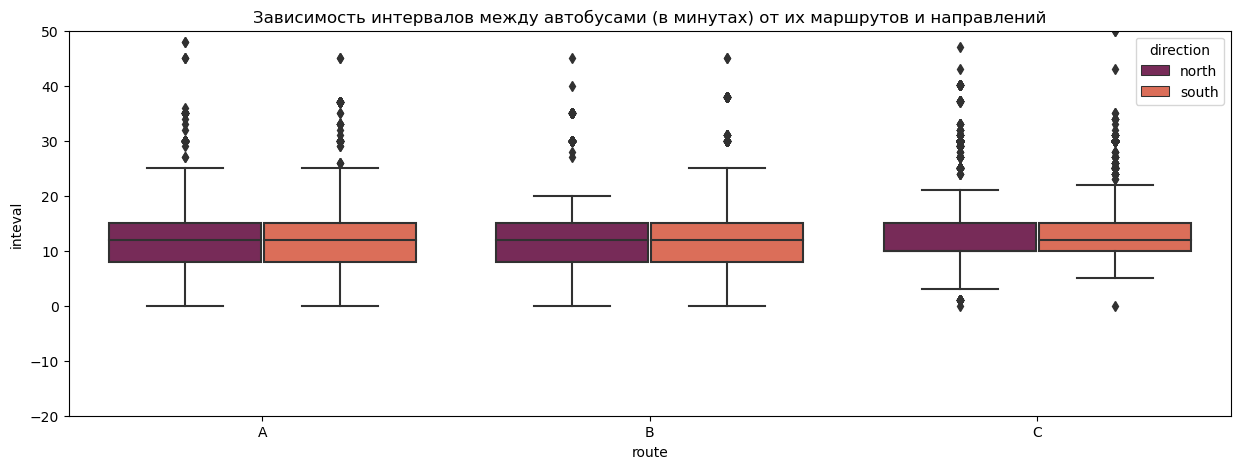

In [19]:
# sns.barplot(data= df, x="route", y="inteval", hue="direction")
ax = plt.figure(figsize=(15,5))
ax = sns.boxplot(x="route", y="inteval", hue="direction", data=df,palette="rocket")  # RUN PLOT   
plt.title('Зависимость интервалов между автобусами (в минутах) от их маршрутов и направлений')
ax.set_ylim(-20,50)
plt.show()

plt.clf()
plt.close()

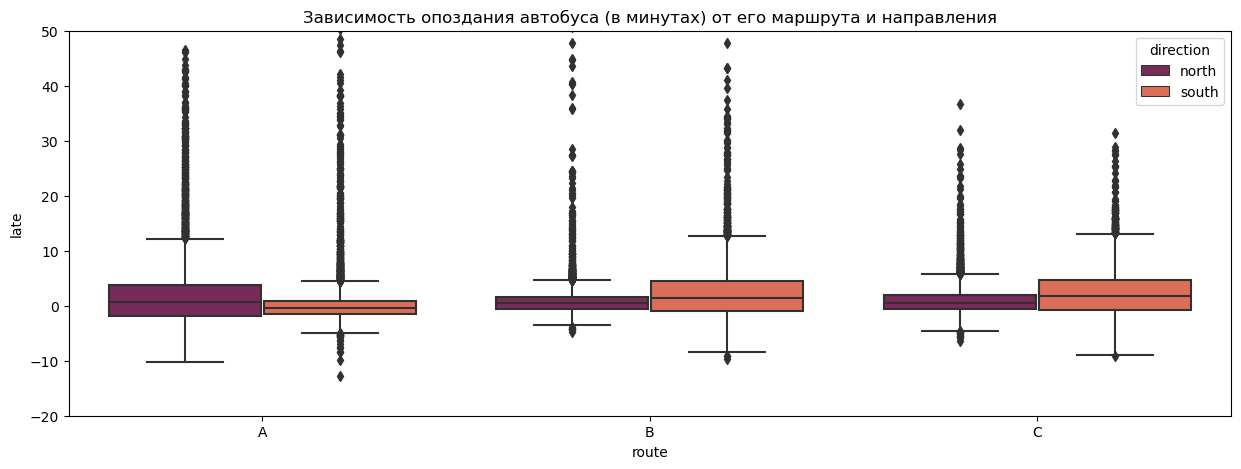

In [21]:
# sns.barplot(data= df, x="route", y="inteval", hue="direction")
ax = plt.figure(figsize=(15,5))
ax = sns.boxplot(x="route", y="late", hue="direction", data=df,palette="rocket")  # RUN PLOT  
ax.set_ylim(-20,50)
plt.title('Зависимость опоздания автобуса (в минутах) от его маршрута и направления')
plt.show()

plt.clf()
plt.close()

#### Можно, что либо сказать о маршрутах автобусов содержательно?

Разброс опозданий у автобусов "А-север", "В-юг","С-юг" более широкий (их дисперсия больше) , чем у "А-юг", "В-север","С-север", медианное значение опозданий автобусов в минутах примерно равно нулю, их распределение примерно симметрично (тк усы не скошены влево/вправо), у автобусов направления С меньше всего выбросов (возможно, на этом пути не ям, и они реже ломаются по пути)). Автобусы маршрута В чуть реже остальных приходят раньше расписания (боксплот чуть выше). Самые маленькие интервалы между автобусами у автобусов "В-север","С-юг","С-север"

## Задание финальное ... для тех кто может
Давайте попробуем заполнить пропущенные данные в расписании  - `df_null`. Как это сделать правильно?

Попытка применить интерполяцию!! попытка не пытка....

In [22]:
full=pd.read_csv('bus_table.csv')
full=full.drop_duplicates()
full['data']=pd.to_datetime(full['data'])
full['scheduled']=pd.to_timedelta(full['scheduled'])
full['actual']=pd.to_timedelta(full['actual'])
full

,data,route,direction,scheduled,actual
0,2016-03-26,A,south,0 days 01:11:57,0 days 01:13:19
1,2016-03-26,A,south,0 days 23:19:57,0 days 23:16:13
2,2016-03-26,A,south,0 days 21:19:57,0 days 21:18:46
3,2016-03-26,A,south,0 days 19:04:57,0 days 19:01:49
4,2016-03-26,A,south,0 days 16:42:57,0 days 16:42:39
...,...,...,...,...,...
39152,2016-05-27,B,north,0 days 10:50:25,0 days 10:49:50
39153,2016-05-27,B,north,0 days 13:02:27,0 days 13:07:10
39154,2016-05-27,B,north,0 days 15:14:29,0 days 15:15:55
39155,2016-05-27,B,north,0 days 17:26:29,0 days 17:25:40


In [23]:
full.sort_values(['route','direction','actual'],inplace=True)
full

,data,route,direction,scheduled,actual
24648,2016-05-23,A,north,0 days 00:00:25,0 days 00:00:24
22601,2016-04-03,A,north,0 days 00:00:25,0 days 00:00:28
26138,2016-05-09,A,north,0 days 00:00:25,0 days 00:00:34
24885,2016-05-20,A,north,0 days 00:00:25,0 days 00:00:52
25035,2016-05-19,A,north,0 days 00:00:25,0 days 00:00:53
...,...,...,...,...,...
11569,2016-05-09,C,south,0 days 23:53:59,0 days 23:58:56
10133,2016-05-23,C,south,0 days 23:53:59,0 days 23:59:05
13118,2016-04-23,C,south,0 days 23:57:59,0 days 23:59:06
10929,2016-05-15,C,south,0 days 23:57:59,0 days 23:59:07


In [24]:
full['scheduled']=full['scheduled'].interpolate(method='linear')
full

,data,route,direction,scheduled,actual
24648,2016-05-23,A,north,0 days 00:00:25,0 days 00:00:24
22601,2016-04-03,A,north,0 days 00:00:25,0 days 00:00:28
26138,2016-05-09,A,north,0 days 00:00:25,0 days 00:00:34
24885,2016-05-20,A,north,0 days 00:00:25,0 days 00:00:52
25035,2016-05-19,A,north,0 days 00:00:25,0 days 00:00:53
...,...,...,...,...,...
11569,2016-05-09,C,south,0 days 23:53:59,0 days 23:58:56
10133,2016-05-23,C,south,0 days 23:53:59,0 days 23:59:05
13118,2016-04-23,C,south,0 days 23:57:59,0 days 23:59:06
10929,2016-05-15,C,south,0 days 23:57:59,0 days 23:59:07


In [25]:
full.sort_values(['route','direction','data','scheduled'],inplace=True)
full

,data,route,direction,scheduled,actual
19512,2016-03-26,A,north,0 days 00:00:25,0 days 00:05:01
19471,2016-03-26,A,north,0 days 00:30:25,0 days 00:30:19
19487,2016-03-26,A,north,0 days 01:05:25,0 days 01:10:15
19511,2016-03-26,A,north,0 days 02:10:25,0 days 02:19:10
19504,2016-03-26,A,north,0 days 05:25:28,0 days 05:24:49
...,...,...,...,...,...
9708,2016-05-27,C,south,0 days 22:33:59,0 days 22:38:37
9685,2016-05-27,C,south,0 days 22:48:59,0 days 22:48:23
9741,2016-05-27,C,south,0 days 23:03:59,0 days 23:05:18
9721,2016-05-27,C,south,0 days 23:23:59,0 days 23:29:38


In [26]:
df_null.loc[:,'scheduled']=full['scheduled']
df_null.head()

,data,route,direction,scheduled,actual
383,2016-04-01,A,south,0 days 16:01:56,16:00:57
471,2016-03-31,A,south,0 days 15:24:56,15:28:05
588,2016-03-30,A,south,0 days 14:55:56,14:52:36
599,2016-03-30,A,south,0 days 15:11:56,15:12:06
685,2016-03-29,A,south,0 days 17:56:56.500000,17:56:29


In [27]:
df_null.loc[:,'scheduled'] = df_null['scheduled'].astype('str').map(lambda x: x.lstrip('0days'))
df_null

,data,route,direction,scheduled,actual
383,2016-04-01,A,south,days 16:01:56,16:00:57
471,2016-03-31,A,south,days 15:24:56,15:28:05
588,2016-03-30,A,south,days 14:55:56,14:52:36
599,2016-03-30,A,south,days 15:11:56,15:12:06
685,2016-03-29,A,south,days 17:56:56.500000,17:56:29
...,...,...,...,...,...
37327,2016-05-10,B,north,days 15:26:29,15:25:47
37328,2016-05-10,B,north,days 17:42:25,17:44:05
37570,2016-05-12,B,north,days 18:15:29,18:27:55
37670,2016-05-13,B,north,days 19:02:25,19:04:25
